In [1]:
import os
os.chdir("/y/home/zyw/tmp/DeepPurpose/")

In [2]:
from scripts import utils,dataset,DTI

In [3]:
X_drug, X_target, y = dataset.load_process_DAVIS('./data/', binary=False)

Beginning Processing...
Default set to logspace (nM -> p) for easier regression
Done!


In [4]:
drug_encoding = 'Daylight'
target_encoding = 'AAC'

In [5]:
train, val, test = utils.data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method = 'random',frac = [0.7,0.1,0.2], random_seed = 3)

Drug Target Interaction Prediction Mode...
in total: 30056 drug-target pairs
encoding drug...
unique drugs: 68
encoding protein...
unique target sequence: 379
-- Encoding AAC takes time. Time Reference: 24s for ~100 sequences in a CPU.				 Calculate your time by the unique target sequence #, instead of the entire dataset.
splitting dataset...
Done.


In [6]:
config = utils.generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 256,
                         cnn_target_filters = [32,64,96],
                         cnn_target_kernels = [4,8,12])

In [7]:
model = DTI.model_initialize(**config)

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 30.1299. Total time 0.0 hours
Validation at Epoch 1 with loss:0.59033, MSE: 0.61007 , Pearson Correlation: 0.48628 with p-value: 3.02616 , Concordance Index: 0.75627
Training at Epoch 2 iteration 0 with loss 0.81279. Total time 0.00583 hours
Validation at Epoch 2 with loss:0.54633, MSE: 0.54591 , Pearson Correlation: 0.55896 with p-value: 1.13983 , Concordance Index: 0.79563
Training at Epoch 3 iteration 0 with loss 0.61559. Total time 0.01166 hours
Validation at Epoch 3 with loss:0.53167, MSE: 0.54350 , Pearson Correlation: 0.56096 with p-value: 8.42201 , Concordance Index: 0.79588
Training at Epoch 4 iteration 0 with loss 0.51075. Total time 0.0175 hours
Validation at Epoch 4 with loss:0.58534, MSE: 0.54163 , Pearson Correlation: 0.56498 with p-value: 3.96135 , Concordance Index: 0.79660
Training at Epoch 5 iteration 0 with loss 0.51843. Total time 0.02333 hours
Validation at E

Training at Epoch 40 iteration 0 with loss 0.21512. Total time 0.225 hours
Validation at Epoch 40 with loss:0.28539, MSE: 0.27858 , Pearson Correlation: 0.80718 with p-value: 0.0 , Concordance Index: 0.86472
Training at Epoch 41 iteration 0 with loss 0.23866. Total time 0.23055 hours
Validation at Epoch 41 with loss:0.35409, MSE: 0.29962 , Pearson Correlation: 0.79569 with p-value: 0.0 , Concordance Index: 0.86408
Training at Epoch 42 iteration 0 with loss 0.27997. Total time 0.23638 hours
Validation at Epoch 42 with loss:0.24957, MSE: 0.27135 , Pearson Correlation: 0.81141 with p-value: 0.0 , Concordance Index: 0.86711
Training at Epoch 43 iteration 0 with loss 0.31006. Total time 0.24222 hours
Validation at Epoch 43 with loss:0.34764, MSE: 0.28196 , Pearson Correlation: 0.80394 with p-value: 0.0 , Concordance Index: 0.86579
Training at Epoch 44 iteration 0 with loss 0.25136. Total time 0.24805 hours
Validation at Epoch 44 with loss:0.33948, MSE: 0.28936 , Pearson Correlation: 0.80623

Validation at Epoch 79 with loss:0.16514, MSE: 0.26099 , Pearson Correlation: 0.83133 with p-value: 0.0 , Concordance Index: 0.88840
Training at Epoch 80 iteration 0 with loss 0.13325. Total time 0.45611 hours
Validation at Epoch 80 with loss:0.31814, MSE: 0.27233 , Pearson Correlation: 0.83059 with p-value: 0.0 , Concordance Index: 0.87966
Training at Epoch 81 iteration 0 with loss 0.14849. Total time 0.46194 hours
Validation at Epoch 81 with loss:0.21370, MSE: 0.25127 , Pearson Correlation: 0.82845 with p-value: 0.0 , Concordance Index: 0.88855
Training at Epoch 82 iteration 0 with loss 0.14661. Total time 0.46777 hours
Validation at Epoch 82 with loss:0.20923, MSE: 0.25378 , Pearson Correlation: 0.82937 with p-value: 0.0 , Concordance Index: 0.88738
Training at Epoch 83 iteration 0 with loss 0.15056. Total time 0.47361 hours
Validation at Epoch 83 with loss:0.29994, MSE: 0.25241 , Pearson Correlation: 0.83123 with p-value: 0.0 , Concordance Index: 0.88110
Training at Epoch 84 iterat

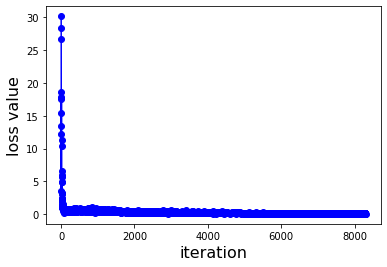

In [8]:
model.train(train, val, test)

In [9]:
model.save_model('./save_model/model_Daylight_AAC_Davis')